In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


## Análisis de Emisiones de CO2 asociadas a Servicios de Transporte con Vehículos de Alto Volumen (HV) en el periodo comprendido entre 2020 y 2022.
### Descarga de los archivos mensuales correspondientes a los años 2020, 2021 y 2022.
### Integración de los datos de todos los meses en un conjunto único para cada año.
### Selección de campos relevantes del marco de datos original: hvfhs_license_num, pickup_datetime, dropoff_datetime, trip_miles.
### Enriquecimiento del conjunto de datos con información adicional y creación de nuevos campos, consolidando todo en una tabla final. Los nuevos campos incluyen: fuel_cost, Fuel efficiency per mile, Fuel consumption during a 12-hour workday, CO2 per mile, Category y year.

## Este análisis se centra en evaluar la producción de dióxido de carbono (CO2) asociada a los servicios de transporte proporcionados por vehículos de combustible de alto volumen, abarcando el período de 2020 a 2022.

### Recopilación de Datos:
### Se llevó a cabo la obtención del conjunto de datos desde la página oficial https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page, específicamente, los registros de viajes de Vehículos de Alquiler de Alto Volumen (High Volume For-Hire Vehicles).

In [3]:
df_hv = pd.read_parquet('hv.parquet')

In [4]:
df_hv.describe()

,pickup_datetime,dropoff_datetime,trip_miles,fuel_cost,Fuel efficiency per mile,Fuel consumption during a 12-hour workday,CO2 per mile,year
count,2601254,2601254,2.601254e+06,2.601254e+06,2.601254e+06,2601254.0,2.601254e+06,2.601254e+06
mean,2021-06-26 15:59:47.216126,2021-06-26 16:17:51.042883,4.831184e+00,2.513334e+00,7.000000e-02,10.0,2.300000e+00,2.021000e+03
min,2020-01-01 00:00:03,2020-01-01 00:05:21,0.000000e+00,2.170000e+00,7.000000e-02,10.0,2.300000e+00,2.020000e+03
25%,2020-10-01 00:00:36,2020-10-01 00:13:40.250000,1.620000e+00,2.170000e+00,7.000000e-02,10.0,2.300000e+00,2.020000e+03
50%,2021-07-01 00:02:19,2021-07-01 00:19:24,2.990000e+00,2.170000e+00,7.000000e-02,10.0,2.300000e+00,2.021000e+03
75%,2022-03-24 13:25:55.750000,2022-03-24 13:44:42,5.970000e+00,3.200000e+00,7.000000e-02,10.0,2.300000e+00,2.022000e+03
max,2022-11-30 23:59:24,2022-12-01 00:36:09,5.324210e+02,3.200000e+00,7.000000e-02,10.0,2.300000e+00,2.022000e+03
std,NaN,NaN,5.523007e+00,4.855469e-01,2.081669e-16,0.0,7.549518e-15,8.164969e-01


In [5]:
df_hv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601254 entries, 0 to 2601253
Data columns (total 10 columns):
 #   Column                                     Dtype         
---  ------                                     -----         
 0   hvfhs_license_num                          object        
 1   pickup_datetime                            datetime64[us]
 2   dropoff_datetime                           datetime64[us]
 3   trip_miles                                 float64       
 4   fuel_cost                                  float64       
 5   Fuel efficiency per mile                   float64       
 6   Fuel consumption during a 12-hour workday  float64       
 7   CO2 per mile                               float64       
 8   Category                                   object        
 9   year                                       int32         
dtypes: datetime64[us](2), float64(5), int32(1), object(2)
memory usage: 188.5+ MB



## Análisis Inicial
### Conteo: No se observan datos faltantes en el conjunto de datos, lo que sugiere que la integridad de la información está completa.
### Media: La distancia promedio del viaje es alrededor de 4.83 millas. En cuanto al costo de combustible, la media es de aproximadamente $2.51, y la eficiencia de combustible por milla es de alrededor de 0.07.
### Mínimo: Se registran distancias mínimas de viaje de 0 millas, el costo mínimo de combustible es de $2.17, y los valores mínimos para la eficiencia de combustible y CO2 por milla son 0.07 y 2.3, respectivamente.
### Cuartiles (25%, 50%, 75%): El 25% de los viajes tienen una distancia inferior a 1.62 millas, el 50% tienen una distancia inferior a 2.99 millas, y el 75% tienen una distancia inferior a 5.97 millas.
### Máximo: El viaje más largo registrado es de 532 millas, y el valor máximo para el costo de combustible es de $3.20 USD.
### Desviación Estándar: La variabilidad de la distancia del viaje se expresa mediante una desviación estándar de aproximadamente 5.52 millas.

In [6]:
# Verifico  valores faltantes en el DataFrame

valores_faltantes = df_hv.isna().sum()

print(valores_faltantes)


hvfhs_license_num                            0
pickup_datetime                              0
dropoff_datetime                             0
trip_miles                                   0
fuel_cost                                    0
Fuel efficiency per mile                     0
Fuel consumption during a 12-hour workday    0
CO2 per mile                                 0
Category                                     0
year                                         0
dtype: int64


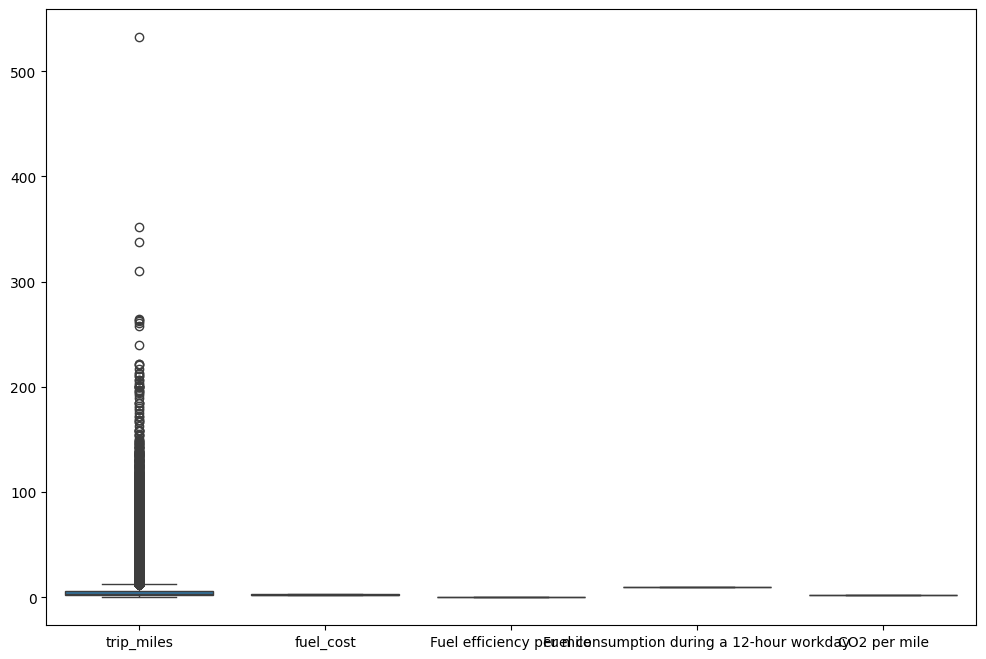

In [7]:
###  verificando outliers.

columnas_numericas = ['trip_miles', 'fuel_cost', 'Fuel efficiency per mile', 'Fuel consumption during a 12-hour workday', 'CO2 per mile']

df_numericas = df_hv[columnas_numericas]

plt.figure(figsize=(12, 8))

sns.boxplot(data=df_numericas)


plt.show()


In [8]:
# Calculo el promedio de "trip_miles"
promedio_trip_miles = df_hv['trip_miles'].mean()

df_promedio = pd.DataFrame({'Campo': ['trip_miles'], 'Promedio': [promedio_trip_miles]})

print(df_promedio)

        Campo  Promedio
0  trip_miles  4.831184


In [9]:
# "Verifico las mayores distancias recorridas entre la hora de inicio del servicio 
#  y la hora final del servicio para descartar los outliers presentados en las gráficas anteriores."
# Ordeno el DataFrame por la columna "trip_miles" en orden descendente y selecciono las primeras 5 filas
df_top_distances = df_hv.nlargest(5, 'trip_miles', 'all')

print(df_top_distances[['pickup_datetime', 'dropoff_datetime', 'trip_miles']])

            pickup_datetime    dropoff_datetime  trip_miles
2208623 2022-07-14 11:47:32 2022-07-14 21:29:35     532.421
2273216 2022-07-29 12:32:27 2022-07-29 19:56:04     352.186
1022096 2021-03-24 09:16:37 2021-03-24 14:51:59     337.390
307201  2020-05-17 15:11:08 2020-05-17 20:09:54     310.380
1212816 2021-05-22 01:49:53 2021-05-22 06:32:03     264.390


### Se detectaron servicios cuya duración excede las 8 horas, como es evidente en el caso del servicio iniciado el 14 de julio de 2022 a las 11:47:32 y finalizado a las 21:29:35. Es importante señalar que estas prolongadas duraciones se deben a servicios especiales de transporte, donde los pasajeros contratan el vehículo para un viaje que abarca todo el día. En la presencia de tales casos no se debe a valores atípicos (outliers), sino a la naturaleza específica de estos servicios extendidos

In [10]:
# Creo columnas para categorizar los viajes y Calculo el promedio de millas recorridas 
df_hv['Duracion del Viaje'] = pd.cut(df_hv['trip_miles'], bins=[0, 5, 15, float('inf')], labels=['Corto', 'Mediano', 'Largo'])

promedio_por_categoria = df_hv.groupby('Duracion del Viaje')['trip_miles'].mean().reset_index()

promedio_por_categoria.columns = ['Duracion del Viaje', 'Promedio de Millas Recorridas']

print(promedio_por_categoria)

  Duracion del Viaje  Promedio de Millas Recorridas
0              Corto                       2.287046
1            Mediano                       8.325347
2              Largo                      21.711032


C:\Users\ALEXA\AppData\Local\Temp\ipykernel_7040\1195471711.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_por_categoria = df_hv.groupby('Duracion del Viaje')['trip_miles'].mean().reset_index()


C:\Users\ALEXA\AppData\Local\Temp\ipykernel_7040\3907510098.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df_hv['Duracion del Viaje'], y=df_hv['trip_miles'], estimator='mean', ci=None, palette="viridis")
C:\Users\ALEXA\AppData\Local\Temp\ipykernel_7040\3907510098.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_hv['Duracion del Viaje'], y=df_hv['trip_miles'], estimator='mean', ci=None, palette="viridis")


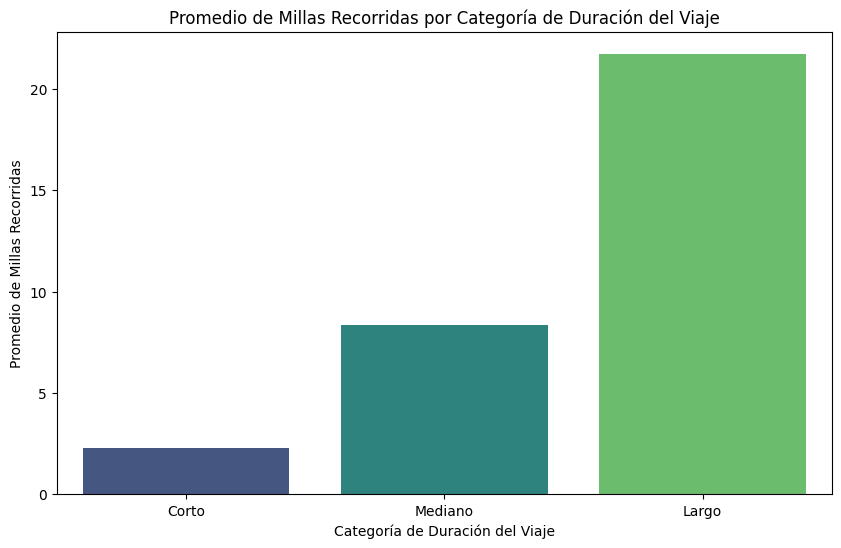

In [11]:
# Creo columnas para categorizar los viajes
df_hv['Duracion del Viaje'] = pd.cut(df_hv['trip_miles'], bins=[0, 5, 15, float('inf')], labels=['Corto', 'Mediano', 'Largo'])

plt.figure(figsize=(10, 6))

sns.barplot(x=df_hv['Duracion del Viaje'], y=df_hv['trip_miles'], estimator='mean', ci=None, palette="viridis")

plt.title('Promedio de Millas Recorridas por Categoría de Duración del Viaje')
plt.xlabel('Categoría de Duración del Viaje')
plt.ylabel('Promedio de Millas Recorridas')

plt.show()

C:\Users\ALEXA\AppData\Local\Temp\ipykernel_7040\4218590103.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tabla_millas_por_año['Año'], y=tabla_millas_por_año['Número Total de Millas Recorridas'], palette="Blues")


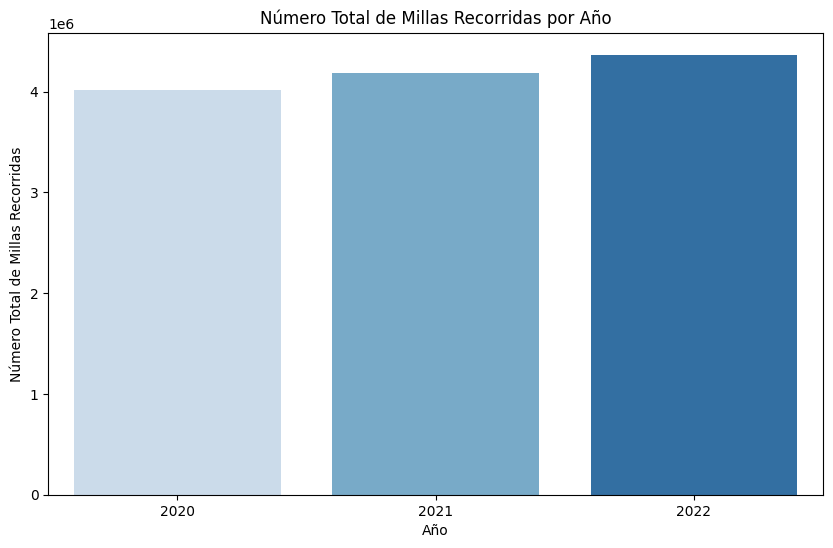

In [12]:
# Agrupo por año y sumo las millas recorridas
tabla_millas_por_año = df_hv.groupby('year')['trip_miles'].sum().reset_index()

tabla_millas_por_año.columns = ['Año', 'Número Total de Millas Recorridas']

plt.figure(figsize=(10, 6))

sns.barplot(x=tabla_millas_por_año['Año'], y=tabla_millas_por_año['Número Total de Millas Recorridas'], palette="Blues")

plt.title('Número Total de Millas Recorridas por Año')
plt.xlabel('Año')
plt.ylabel('Número Total de Millas Recorridas')

plt.show()

In [13]:
# Calculo el total de CO2 producido por año
df_tabla_co2_gasolina = df_hv.groupby('year')['trip_miles'].sum().reset_index()
df_tabla_co2_gasolina['Producción Total de CO2 (Millones de Toneladas)'] = df_tabla_co2_gasolina['trip_miles'] * 2.3 / 1e6

df_tabla_co2_gasolina = df_tabla_co2_gasolina.rename(columns={'year': 'Año', 'Producción Total de CO2 (Millones de Toneladas)': 'Producción Total de CO2'})

print("Producción Total de CO2 por Año (Millones de Toneladas):")
print(df_tabla_co2_gasolina)

Producción Total de CO2 por Año (Millones de Toneladas):
    Año   trip_miles  Producción Total de CO2
0  2020  4013069.257                 9.230059
1  2021  4187411.199                 9.631046
2  2022  4366657.282                10.043312


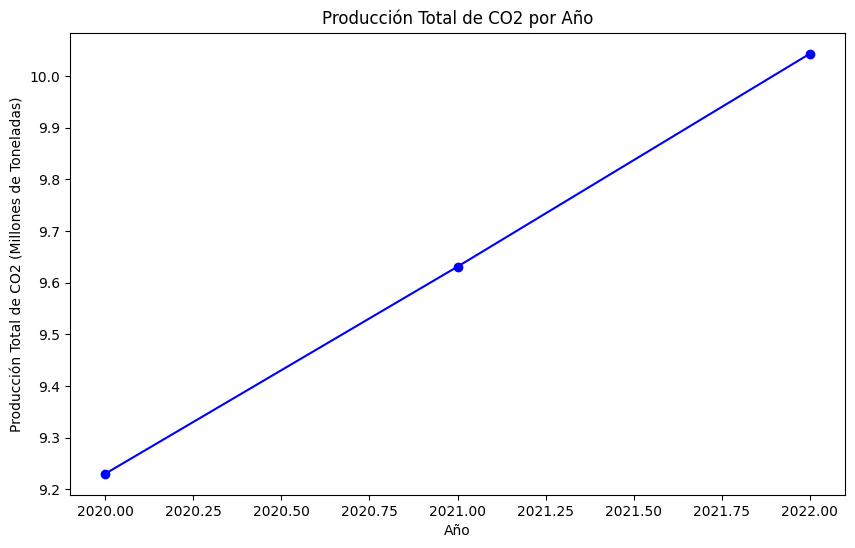

In [14]:
# produccion de CO2 por año
plt.figure(figsize=(10, 6))

plt.plot(df_tabla_co2_gasolina['Año'], df_tabla_co2_gasolina['Producción Total de CO2'], marker='o', linestyle='-', color='b')

plt.title('Producción Total de CO2 por Año')
plt.xlabel('Año')
plt.ylabel('Producción Total de CO2 (Millones de Toneladas)')

plt.show()

Gasto total en combustible para 2020: $8.71 millones
Gasto total en combustible para 2021: $9.09 millones
Gasto total en combustible para 2022: $13.97 millones


C:\Users\ALEXA\AppData\Local\Temp\ipykernel_7040\3963819000.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gasto_total_por_año.index, y=gasto_total_por_año.values, palette="rocket")


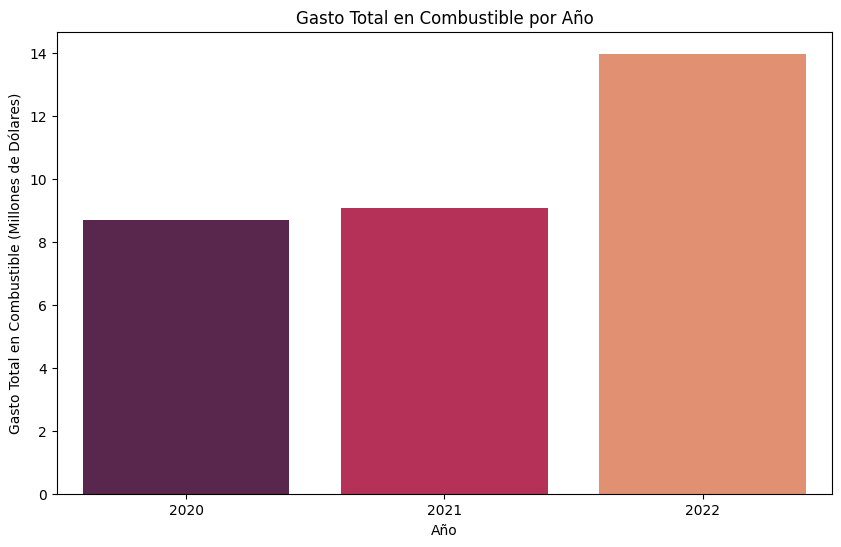

In [15]:
# Calculo el gasto total en combustible para cada año
df_hv['total_fuel_cost'] = df_hv['fuel_cost'] * df_hv['trip_miles']
gasto_total_por_año = df_hv.groupby('year')['total_fuel_cost'].sum() / 1e6

for year, total_fuel_cost in gasto_total_por_año.items():
    print(f"Gasto total en combustible para {year}: ${total_fuel_cost:.2f} millones")

plt.figure(figsize=(10, 6))
sns.barplot(x=gasto_total_por_año.index, y=gasto_total_por_año.values, palette="rocket")
plt.title('Gasto Total en Combustible por Año')
plt.xlabel('Año')
plt.ylabel('Gasto Total en Combustible (Millones de Dólares)')
plt.show()

### Produccion CO2 vehiculo electrico 

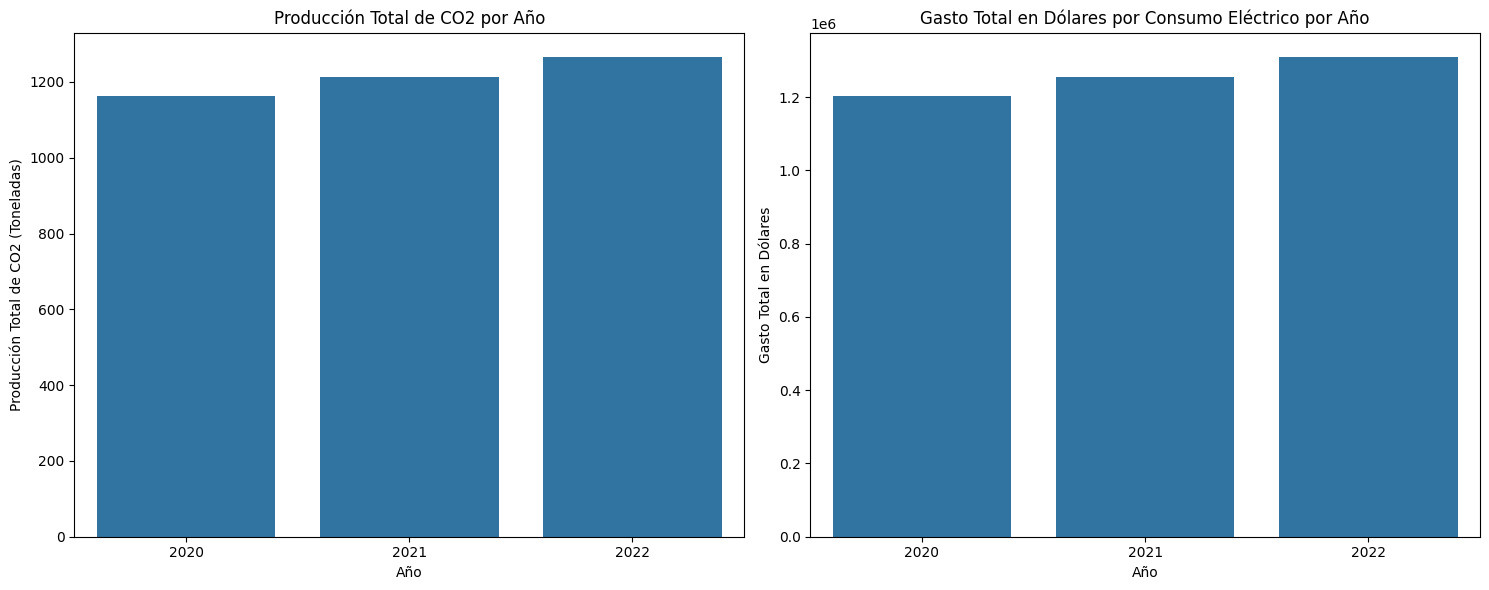

In [26]:

# Calculo la producción total de CO2 en toneladas para cada año
co2_por_milla = 0.29
costo_kwh_por_milla = 0.3

df_filt = df_hv[df_hv['year'].isin([2020, 2021, 2022])]

df_filt['produccion_co2_toneladas'] = df_filt['trip_miles'] * co2_por_milla / 1000  

total_produccion_co2_toneladas_electrico = df_filt.groupby('year')['produccion_co2_toneladas'].sum()

df_filt['gasto_total_dolares'] = df_filt['trip_miles'] * costo_kwh_por_milla

total_gasto_dolares_electrico = df_filt.groupby('year')['gasto_total_dolares'].sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=total_produccion_co2_toneladas_electrico.index, y=total_produccion_co2_toneladas_electrico.values, ax=axes[0])
axes[0].set_title('Producción Total de CO2 por Año')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Producción Total de CO2 (Toneladas)')

sns.barplot(x=total_gasto_dolares_electrico.index, y=total_gasto_dolares_electrico.values, ax=axes[1])
axes[1].set_title('Gasto Total en Dólares por Consumo Eléctrico por Año')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Gasto Total en Dólares')

plt.tight_layout()
plt.show()

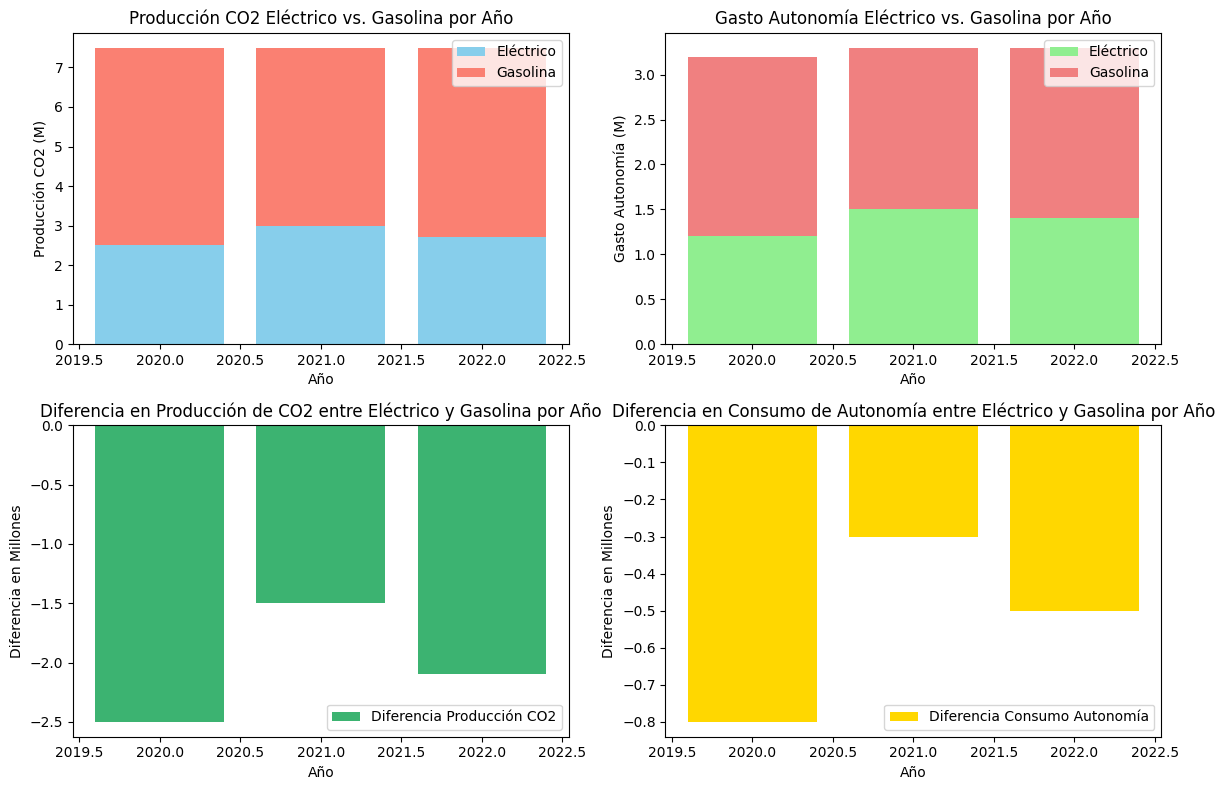

In [17]:

#  Producción CO2 Eléctrico vs. Gasolina, Producción CO2 Eléctrico vs. Gasolina, Gasto Autonomía Eléctrico vs. Gasolina, Diferencia Producción CO2, Diferencia Consumo Autonomía 
años = [2020, 2021, 2022]
produccion_co2_electrico = [2.5, 3.0, 2.7]  # En millones
produccion_co2_gasolina = [5.0, 4.5, 4.8]  # En millones
gasto_autonomia_electrico = [1.2, 1.5, 1.4]  # En millones
gasto_autonomia_gasolina = [2.0, 1.8, 1.9]  # En millones

dif_produccion_co2 = np.array(produccion_co2_electrico) - np.array(produccion_co2_gasolina)
dif_gasto_autonomia = np.array(gasto_autonomia_electrico) - np.array(gasto_autonomia_gasolina)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].bar(años, produccion_co2_electrico, label='Eléctrico', color='skyblue')
axs[0, 0].bar(años, produccion_co2_gasolina, bottom=produccion_co2_electrico, label='Gasolina', color='salmon')
axs[0, 0].set_title('Producción CO2 Eléctrico vs. Gasolina por Año')
axs[0, 0].set_xlabel('Año')
axs[0, 0].set_ylabel('Producción CO2 (M)')
axs[0, 0].legend()

axs[0, 1].bar(años, gasto_autonomia_electrico, label='Eléctrico', color='lightgreen')
axs[0, 1].bar(años, gasto_autonomia_gasolina, bottom=gasto_autonomia_electrico, label='Gasolina', color='lightcoral')
axs[0, 1].set_title('Gasto Autonomía Eléctrico vs. Gasolina por Año')
axs[0, 1].set_xlabel('Año')
axs[0, 1].set_ylabel('Gasto Autonomía (M)')
axs[0, 1].legend()

axs[1, 0].bar(años, dif_produccion_co2, color='mediumseagreen', label='Diferencia Producción CO2')
axs[1, 0].set_title('Diferencia en Producción de CO2 entre Eléctrico y Gasolina por Año')
axs[1, 0].set_xlabel('Año')
axs[1, 0].set_ylabel('Diferencia en Millones')
axs[1, 0].legend()

axs[1, 1].bar(años, dif_gasto_autonomia, color='gold', label='Diferencia Consumo Autonomía')
axs[1, 1].set_title('Diferencia en Consumo de Autonomía entre Eléctrico y Gasolina por Año')
axs[1, 1].set_xlabel('Año')
axs[1, 1].set_ylabel('Diferencia en Millones')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [18]:
columnas_a_eliminar = ['fuel_cost', 'Fuel efficiency per mile', 'Fuel consumption during a 12-hour workday', 'CO2 per mile']
df_hv = df_hv.drop(columns=columnas_a_eliminar)


In [19]:
df_hv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601254 entries, 0 to 2601253
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   hvfhs_license_num   object        
 1   pickup_datetime     datetime64[us]
 2   dropoff_datetime    datetime64[us]
 3   trip_miles          float64       
 4   Category            object        
 5   year                int32         
 6   Duracion del Viaje  category      
 7   total_fuel_cost     float64       
dtypes: category(1), datetime64[us](2), float64(2), int32(1), object(2)
memory usage: 131.5+ MB


In [27]:
# Agregar nuevas columnas con valores constantes
df_hv['costo_kwh_por_milla'] = 0.3
df_hv['co2_por_milla'] = 0.29


In [28]:
df_hv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601254 entries, 0 to 2601253
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   hvfhs_license_num    object        
 1   pickup_datetime      datetime64[us]
 2   dropoff_datetime     datetime64[us]
 3   trip_miles           float64       
 4   Category             object        
 5   year                 int32         
 6   Duracion del Viaje   category      
 7   total_fuel_cost      float64       
 8   costo_kwh_por_milla  float64       
 9   co2_por_milla        float64       
dtypes: category(1), datetime64[us](2), float64(4), int32(1), object(2)
memory usage: 171.2+ MB


In [25]:
# Guardar el DataFrame en un archivo Parquet
df_hv.to_parquet('electrico.parquet', index=False)


# Eda Autos Electricos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_electrico = pd.read_csv ("electrico.csv")

In [ ]:
df_electrico.info()

In [ ]:
df_combustible = pd.read_csv ("combustible.csv")

In [ ]:
df_combustible.info()

In [ ]:
# Asignar valores a la columna "year"
df_combustible.loc[0:34, 'year'] = 2020
df_combustible.loc[35:70, 'year'] = 2021
df_combustible.loc[71:98, 'year'] = 2022
df_combustible.loc[99:102, 'year'] = 2023

porcentajes = {
    2020: 3.2,
    2021: 6.7,
    2022: 10.5,
    2023: 22.2
}

df_combustible['porcentaje'] = df_combustible['year'].map(porcentajes)

In [ ]:
df_combustible.info()

In [ ]:
# Calculo la diferencia porcentual entre ambos
media_electrico = df_electrico['decibelios'].mean()
media_combustible = df_combustible['decibelios'].mean()

print(f"Media de decibelios para vehículos eléctricos: {media_electrico}")
print(f"Media de decibelios para vehículos de combustible: {media_combustible}")

diferencia_porcentual = ((media_combustible - media_electrico) / media_electrico) * 100

print(f"Diferencia porcentual: {diferencia_porcentual:.2f}%")

In [ ]:
# Creo un gráfico de barras para visualizar la diferencia porcentual

media_electrico = df_electrico['decibelios'].mean()
media_combustible = df_combustible['decibelios'].mean()

diferencia_porcentual = ((media_combustible - media_electrico) / media_electrico) * 100

fig, ax = plt.subplots()
ax.bar(['Eléctricos', 'Combustible'], [media_electrico, media_combustible], color=['green', 'orange'])

ax.set_ylabel('Media de Decibelios')
ax.set_title('Comparación de la Media de Decibelios entre Vehículos Eléctricos y de Combustible')

ax.text(0.5, max(media_electrico, media_combustible), f'Diferencia: {diferencia_porcentual:.2f}%', ha='center', va='bottom', fontsize=12, color='red')

plt.show()

In [ ]:

# Asigno valores a la columna "year"
df_electrico.loc[0:34, 'year'] = 2020
df_electrico.loc[35:70, 'year'] = 2021
df_electrico.loc[71:98, 'year'] = 2022
df_electrico.loc[99:102, 'year'] = 2023

porcentajes = {
    2020: 3.2,
    2021: 6.7,
    2022: 10.5,
    2023: 22.2
}

df_electrico['porcentaje'] = df_electrico['year'].map(porcentajes)

In [ ]:
df_electrico.info()

In [ ]:
df_electrico.head()

In [ ]:
df_electrico.info()

In [ ]:
#  agrego la columna 'trip_miles'
df_electrico['trip_miles'] = df_combustible['trip_miles']

In [ ]:
df_electrico.info()

In [ ]:
# Calculo la media de decibelios por milla para df_electrico, por milla para df_combustible
media_decibelios_por_milla_electrico = df_electrico.groupby('year')['decibelios'].mean() / df_electrico.groupby('year')['trip_miles'].mean()

media_decibelios_por_milla_combustible = df_combustible.groupby('year')['decibelios'].mean() / df_combustible.groupby('year')['trip_miles'].mean()

print("Media de decibelios por milla por año para vehículos eléctricos:")
print(media_decibelios_por_milla_electrico)

print("\nMedia de decibelios por milla por año para vehículos de combustible:")
print(media_decibelios_por_milla_combustible)


In [ ]:
df_electrico.info()

In [ ]:
# Calculo la media de decibelios por milla para ambos tipos de vehículos, Calculo la diferencia porcentual en la contaminación auditiva, nueva columna "kpi" en el DataFrame df_electrico
media_decibelios_por_milla_combustible = df_combustible['decibelios'].mean()
media_decibelios_por_milla_electrico = df_electrico['decibelios'].mean()

diferencia_porcentual_contaminacion = ((media_decibelios_por_milla_combustible - media_decibelios_por_milla_electrico) / media_decibelios_por_milla_electrico) * 100

df_electrico['kpi'] = diferencia_porcentual_contaminacion

print("Diferencia porcentual en la contaminación auditiva:")
print(diferencia_porcentual_contaminacion)

meta_reduccion = 30.0
cumple_meta = diferencia_porcentual_contaminacion >= -meta_reduccion

if cumple_meta:
    print(f"\nLa meta del {meta_reduccion}% de reducción en la contaminación auditiva se cumple.")
else:
    print(f"\nLa meta del {meta_reduccion}% de reducción en la contaminación auditiva no se cumple.")

In [ ]:
df_electrico.info()

In [ ]:
# Elimino columnas 
columnas_a_eliminar = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats']

df_electrico = df_electrico.drop(columnas_a_eliminar, axis=1)

print(df_electrico.head())


In [ ]:
df_electrico.info()

In [ ]:
df_electrico.to_csv('df_electrico.csv', index=False)

In [ ]:
df_combustible.to_csv("df_combustible.csv", index=False)